## Stimulate network of 100 neurons with Poisson stimulation

In [2]:
import torch
import sys
import matplotlib.pyplot as plt
sys.path.append('../')

from spiking_network.models import SpikingModel
from spiking_network.stimulation import PoissonStimulation
from spiking_network.datasets import W0Dataset, GlorotParams

In [4]:
# Create a dataset with 100 neurons
n_neurons = 100
datasets = 1
n_steps = 10000
dataset = W0Dataset(n_neurons, datasets, GlorotParams())
w0 = dataset[0]

# Create a spiking model
model = SpikingModel()

# Create a Poisson stimulation
targets = torch.randint(0, n_neurons, (10,)).tolist()
stimulation = PoissonStimulation(targets, periods=5, temporal_scales=2, strengths=2, duration=n_steps, n_neurons=n_neurons)

# Simulate the model
X = model.simulate(w0, n_steps, stimulation=stimulation)

100%|██████████| 10000/10000 [00:05<00:00, 1678.57it/s]


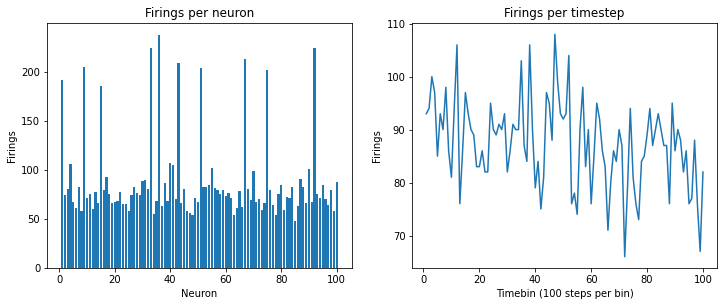

In [5]:
# Plot the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
fig.set_figheight(4.5)
fig.set_figwidth(12)

axes[0].set_title("Firings per neuron")
axes[0].set_ylabel("Firings")
axes[0].set_xlabel("Neuron")
axes[0].bar(range(1, n_neurons + 1), torch.sum(X, axis=1), lw=0)

axes[1].set_title("Firings per timestep")
axes[1].set_ylabel("Firings")
axes[1].set_xlabel(f"Timebin ({n_steps // 100} steps per bin)")
axes[1].plot(range(1, 101), torch.sum(X, axis=0).reshape(100, -1).sum(axis=0))